#### **Cargando y visualizando la Base de Datos House Price**

In [1]:
from sklearn import cluster, metrics
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, Normalizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
house = pd.read_csv("housedata.csv")
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
print(house.dtypes)

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object


In [4]:
house2 = house.copy()
for col in house2.columns:
    if house2[col].dtype == 'object':
        house2[col] = OrdinalEncoder().fit_transform(house2[[col]])
X_train = house2.to_numpy()
print(X_train)

[[0.00000000e+00 3.13000000e+05 3.00000000e+00 ... 3.60000000e+01
  6.20000000e+01 0.00000000e+00]
 [0.00000000e+00 2.38400000e+06 5.00000000e+00 ... 3.50000000e+01
  5.80000000e+01 0.00000000e+00]
 [0.00000000e+00 3.42000000e+05 3.00000000e+00 ... 1.80000000e+01
  2.60000000e+01 0.00000000e+00]
 ...
 [6.80000000e+01 4.16904167e+05 3.00000000e+00 ... 3.20000000e+01
  3.70000000e+01 0.00000000e+00]
 [6.90000000e+01 2.03400000e+05 4.00000000e+00 ... 3.50000000e+01
  7.10000000e+01 0.00000000e+00]
 [6.90000000e+01 2.20600000e+05 3.00000000e+00 ... 9.00000000e+00
  2.60000000e+01 0.00000000e+00]]


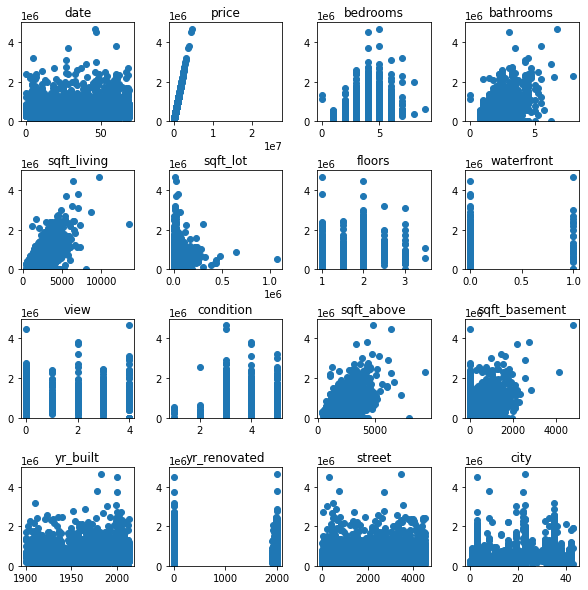

In [5]:
v = 0
fig, axs = plt.subplots(4, 4, figsize=(10, 10))
for i in range(4):
  for j in range(4):
    axs[i,j].scatter(X_train[:,v], X_train[:,1])
    axs[i,j].set_title(house.columns[v])
    axs[i,j].set_ylim([0,0.5e7])
    v+=1
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

### **Número de agrupaciones utilizando la gráfica K-Elbow y el índice Silhouette**

In [6]:
np.random.seed(0)
X = StandardScaler().fit_transform(X_train)
f = 4
t = 'sqft_living'
nc = 11

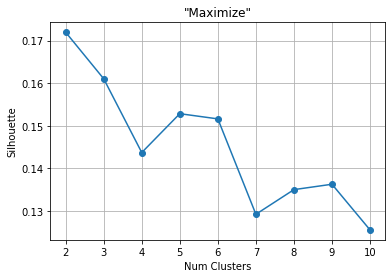

In [7]:
results = {}
for k in range(2, nc):
  k_means = cluster.KMeans(n_clusters=k).fit(X)
  y_pred = k_means.predict(X)
  results[k] = metrics.silhouette_score(X, y_pred)

clusters_counts = list(results.keys())
index_values = list(results.values())

plt.plot(clusters_counts, index_values, 'o-')
plt.grid(True)
plt.title('"Maximize"')
plt.xlabel('Num Clusters')
plt.xticks(clusters_counts)
plt.ylabel('Silhouette')
plt.show()

### **Índice Calinski-Harabasz**

In [8]:
y_preds = []
results = {}
for k in range(2, nc):
  k_means = cluster.KMeans(n_clusters=k).fit(X)
  y_pred = k_means.predict(X)
  y_preds.append(y_pred)
  results[k] = metrics.calinski_harabasz_score(X, y_pred)

clusters_counts = list(results.keys())
index_values = list(results.values())

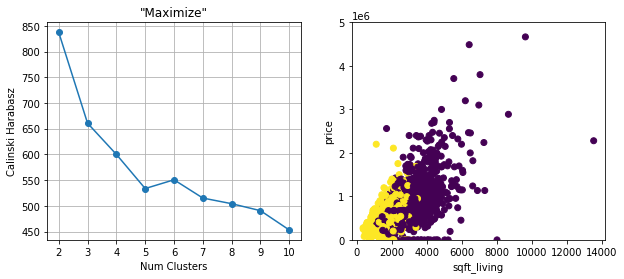

In [9]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10,4))

ax0.plot(clusters_counts, index_values, 'o-')
ax0.grid(True)
ax0.set_title('"Maximize"')
ax0.set_xlabel('Num Clusters')
ax0.set_xticks(clusters_counts)
ax0.set_ylabel('Calinski Harabasz')

ax1.scatter(X_train[:, f], X_train[:, 1], c=y_preds[0])
ax1.set_ylim(0, 0.5e7)
ax1.set_xlabel(t)
ax1.set_ylabel('price')

plt.show()

### **Número de agrupaciones utilizando los valores de los coeficientes de Silhouette (gráfica SilhouettePlot)**

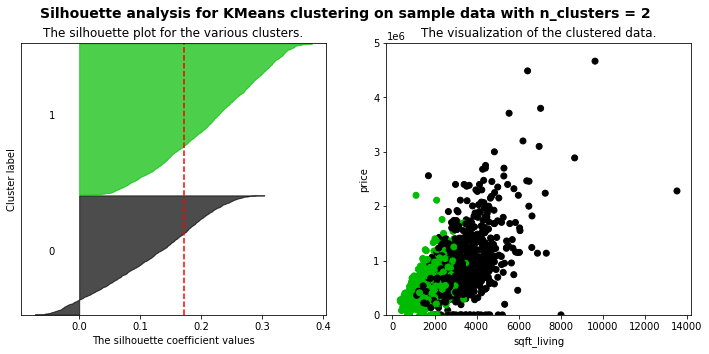

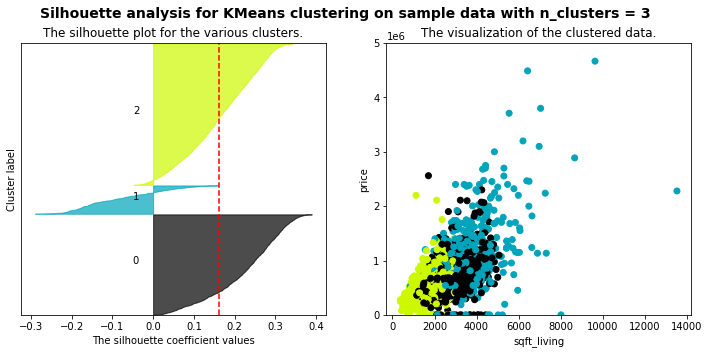

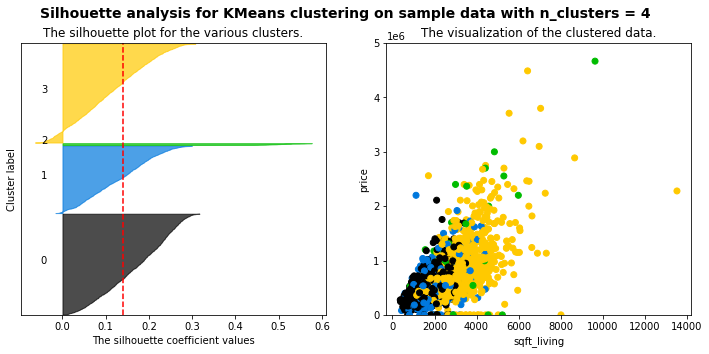

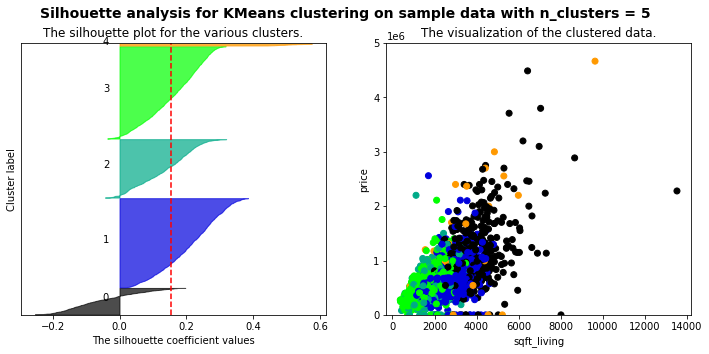

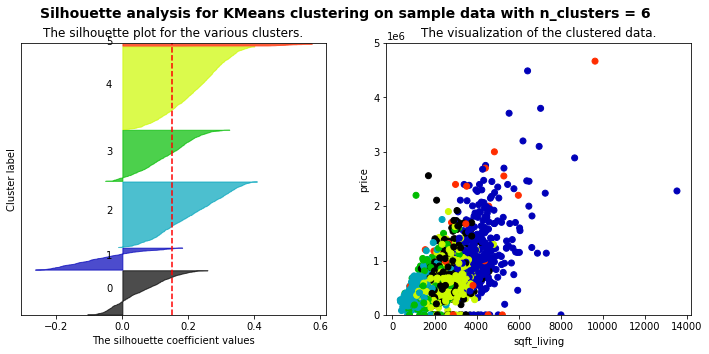

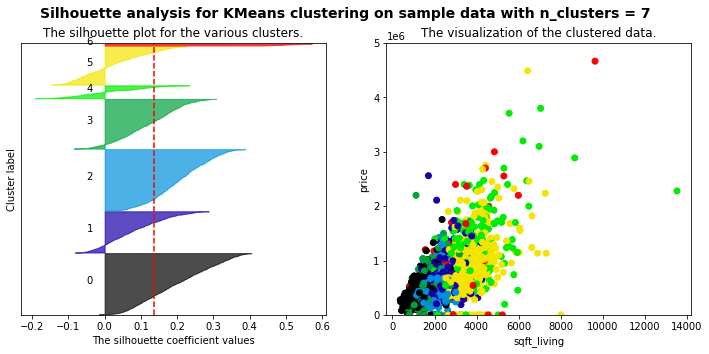

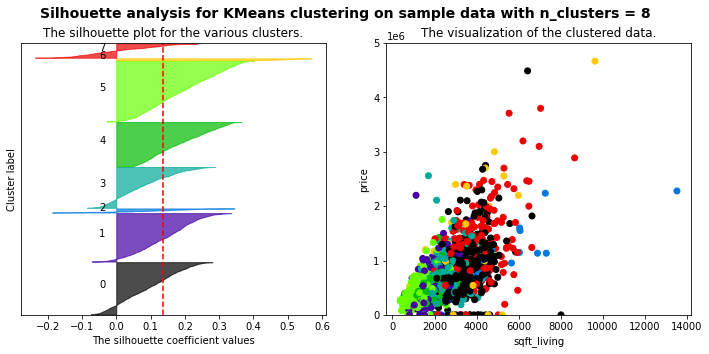

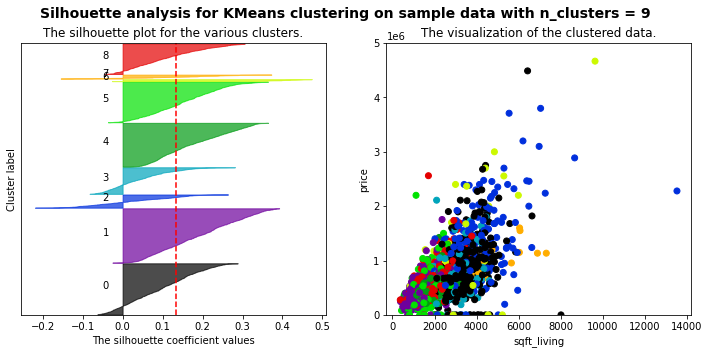

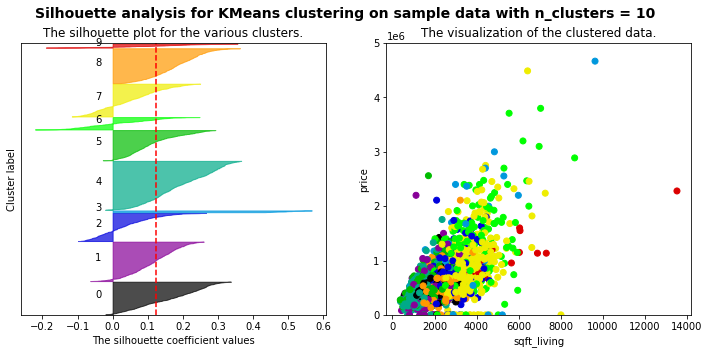

In [10]:
import matplotlib.cm as cm

for k in range(2, nc):
  fig, (ax0, ax1) = plt.subplots(1, 2)
  fig.set_size_inches(12, 5)

  # The (k+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax0.set_ylim([0, len(X) + (k + 1) * 10])

  k_means = cluster.KMeans(n_clusters=k)
  y_pred = k_means.fit_predict(X)
  silhouette_avg = metrics.silhouette_score(X, y_pred)
  sample_silhouette_values = metrics.silhouette_samples(X, y_pred)

  y_lower = 10
  for i in range(k):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[y_pred == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / k)
    ax0.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax0.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

  ax0.set_title("The silhouette plot for the various clusters.")
  ax0.set_xlabel("The silhouette coefficient values")
  ax0.set_ylabel("Cluster label")
  ax0.set_yticks([])  # Clear the yaxis labels / ticks

  # The vertical line for average silhouette score of all the values
  ax0.axvline(x=silhouette_avg, color="red", linestyle="--")

  # 2nd Plot showing the actual clusters formed
  colors = cm.nipy_spectral(y_pred.astype(float) / k)
  ax1.scatter(X_train[:, f], X_train[:, 1], c=colors)
  ax1.set_ylim(0, 0.5e7)
  ax1.set_title("The visualization of the clustered data.")
  ax1.set_xlabel(t)
  ax1.set_ylabel('price')

  plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % k),
                fontsize=14, fontweight='bold')

plt.show()

### **Comparación relativa de distintos Algoritmos de Agrupamiento**

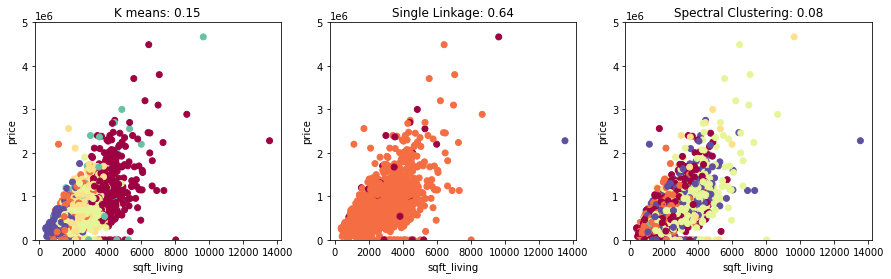

In [11]:
k = 6  # Debido principalmente a las gráficas K-Elbow

k_means = cluster.KMeans(n_clusters=k)
y_pred1 = k_means.fit_predict(X)
s1 = metrics.silhouette_score(X, y_pred1)

single_linkage = cluster.AgglomerativeClustering(linkage="single", n_clusters=k)
y_pred2 = single_linkage.fit_predict(X)
s2 = metrics.silhouette_score(X, y_pred2)

spectral = cluster.SpectralClustering(n_clusters=k, affinity="nearest_neighbors")
y_pred3 = spectral.fit_predict(X)
s3 = metrics.silhouette_score(X, y_pred3)

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(15,4))

ax0.scatter(X_train[:, f], X_train[:, 1], c=y_pred1, cmap=plt.cm.Spectral)
ax0.set_ylim(0, 0.5e7)
ax0.set_title('K means: '+"{:.2f}".format(s1))
ax0.set_xlabel(t)
ax0.set_ylabel('price')

ax1.scatter(X_train[:, f], X_train[:, 1], c=y_pred2, cmap=plt.cm.Spectral)
ax1.set_title('Single Linkage: '+"{:.2f}".format(s2))
ax1.set_ylim(0, 0.5e7)
ax1.set_xlabel(t)
ax1.set_ylabel('price')

ax2.scatter(X_train[:, f], X_train[:, 1], c=y_pred3, cmap=plt.cm.Spectral)
ax2.set_ylim(0, 0.5e7)
ax2.set_title('Spectral Clustering: '+"{:.2f}".format(s3))
ax2.set_xlabel(t)
ax2.set_ylabel('price')

plt.show()

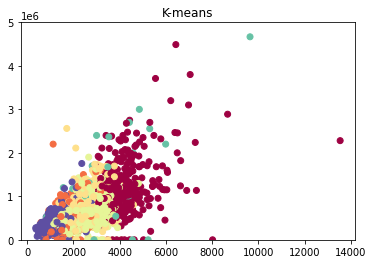

In [12]:
plt.scatter(X_train[:, f], X_train[:, 1], c=y_pred1, cmap=plt.cm.Spectral)
plt.ylim(0, 0.5e7)
plt.title('K-means')
plt.show()

### **Segmentación de los Datos**

In [13]:
house['groups'] = y_pred1
houses = [house[house['groups']==g] for g in range(k)]

In [14]:
for g in range(k):
    print('Group'+str(g),'has',len(houses[g]),'houses.')

Group0 has 381 houses.
Group1 has 877 houses.
Group2 has 758 houses.
Group3 has 1428 houses.
Group4 has 33 houses.
Group5 has 1123 houses.


### **Descripción de los grupos**

In [15]:
grouped = pd.DataFrame() #Inicializar un dataframe vacío
# Añadir una columna para poner el nombre de las variables en cada fila
grouped['Features'] = house.columns[:-1]
# Algoritmo para llenar el dataframe con el promedio de cada variable dentro de cada grupo
for g in range(k):
    row = []
    for col in grouped['Features']:
        if houses[g][col].dtype != 'object':
            row.append(np.round(houses[g][col].mean(),2))
        else:
            row.append(houses[g][col].value_counts().keys()[0])
    grouped['Group'+str(g)] = row
# Visualizar el dataframe
grouped

,Features,Group0,Group1,Group2,Group3,Group4,Group5
0,date,2014-07-09 00:00:00,2014-06-26 00:00:00,2014-06-24 00:00:00,2014-07-08 00:00:00,2014-05-12 00:00:00,2014-06-23 00:00:00
1,price,1.23294e+06,409728,624259,534945,1.45162e+06,378412
2,bedrooms,4.39,3.36,3.88,3.48,3.36,2.67
3,bathrooms,3.47,1.89,2.29,2.53,2.86,1.35
4,sqft_living,4128.61,1811.55,2354.59,2320.01,3471.94,1306.26
5,sqft_lot,47407.6,19668.6,10115.3,10798.6,22130,8185.09
6,floors,1.88,1.11,1.26,2.06,1.65,1.18
7,waterfront,0,0,0,0,1,0
8,view,0.99,0.06,0.5,0.06,3.55,0.08
9,condition,3.34,3.7,4,3.09,3.45,3.39


### **PCA**

In [16]:
from sklearn.decomposition import PCA

X2 = PCA(n_components=2).fit_transform(X)

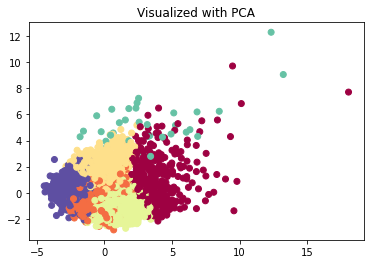

In [17]:
plt.scatter(X2[:, 0], X2[:, 1], c=y_pred1, cmap=plt.cm.Spectral)
plt.title('Visualized with PCA')
plt.show()

In [18]:
print(X2)

[[-1.95910935 -0.09411155]
 [ 3.02005293  4.4850313 ]
 [-0.61735277 -0.55562251]
 ...
 [ 1.58860016 -1.3721487 ]
 [-0.71019224  1.10694357]
 [ 0.05875341 -1.65855524]]


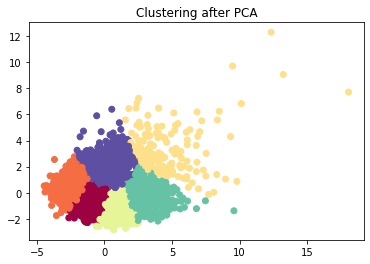

In [19]:
y_pca = cluster.KMeans(n_clusters=6).fit_predict(X2)

plt.scatter(X2[:, 0], X2[:, 1], c=y_pca, cmap=plt.cm.Spectral)
plt.title('Clustering after PCA')
plt.show()

In [20]:
house_pca = house.copy(deep=True)
house_pca['groups'] = y_pca
houses_pca = [house_pca[house_pca['groups']==g] for g in range(k)]

In [21]:
grouped_pca = pd.DataFrame()
grouped_pca['Features'] = house_pca.columns[:-1]
for g in range(k):
    row = []
    for col in grouped_pca['Features']:
        if houses_pca[g][col].dtype != 'object':
            row.append(np.round(houses_pca[g][col].mean(),2))
        else:
            row.append(houses_pca[g][col].value_counts().keys()[0])
    grouped_pca['Group'+str(g)] = row
grouped_pca

,Features,Group0,Group1,Group2,Group3,Group4,Group5
0,date,2014-06-23 00:00:00,2014-06-23 00:00:00,2014-06-20 00:00:00,2014-07-08 00:00:00,2014-06-20 00:00:00,2014-06-25 00:00:00
1,price,380483,371699,1.73549e+06,495961,856486,657634
2,bedrooms,3.09,2.62,4.66,3.47,4.16,3.92
3,bathrooms,1.82,1.26,3.68,2.48,3.08,2.33
4,sqft_living,1584.15,1269.49,4610.09,2212.29,3533.4,2447.8
5,sqft_lot,13018.8,7887.35,39646.6,13968.8,30672.1,12014.6
6,floors,1.26,1.11,1.8,2,1.96,1.27
7,waterfront,0,0,0.14,0,0,0.01
8,view,0.02,0.07,2.3,0.03,0.28,0.63
9,condition,3.45,3.59,3.57,3.14,3.17,3.9


### **Feature importance**

In [22]:
dfg = grouped.transpose()
dfg.columns = dfg.loc['Features']
dfg = dfg.drop('Features')
dfg = dfg[dfg.columns[1:12]]
dfg

Features,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement
Group0,1.23294e+06,4.39,3.47,4128.61,47407.6,1.88,0,0.99,3.34,3420.68,707.94
Group1,409728,3.36,1.89,1811.55,19668.6,1.11,0,0.06,3.7,1484.73,326.83
Group2,624259,3.88,2.29,2354.59,10115.3,1.26,0,0.5,4,1550.15,804.43
Group3,534945,3.48,2.53,2320.01,10798.6,2.06,0,0.06,3.09,2259.05,60.96
Group4,1.45162e+06,3.36,2.86,3471.94,22130,1.65,1,3.55,3.45,2627.55,844.39
Group5,378412,2.67,1.35,1306.26,8185.09,1.18,0,0.08,3.39,1168.64,137.62


In [27]:
import plotly.graph_objects as go
Xt = StandardScaler().fit_transform(dfg.to_numpy())
Xt = Xt + abs(np.min(Xt))
fig = go.Figure()
for j in range(len(dfg)):
  fig.add_trace(go.Bar(
      y=Xt[j,:],
      x=dfg.columns,
      name='Group '+str(j)
  ))
fig.update_layout(
    title='Variable mean per group',
    yaxis_title='normalized values',
    margin=dict(l=50, r=50, t=50, b=50)
)
fig.show()

In [24]:
house1 = house.sort_values('groups')
groups = house1['groups']
house1 = house1[house1.columns[1:12]]
Xt = StandardScaler().fit_transform(house1.to_numpy())
x = ['Group '+str(g) for g in groups]

fig = go.Figure()
for j in range(len(house1.columns)):
  fig.add_trace(go.Box(
      y=Xt[:,j],
      x=x,
      boxpoints=False,
      name=house1.columns[j]
  ))
fig.update_layout(
    title='Variable boxplot grouped',
    yaxis_title='normalized values',
    boxmode='group',
    margin=dict(l=50, r=50, t=50, b=50)
)
fig.show()

### **t-SNE**

In [25]:
from sklearn.manifold import TSNE

In [29]:
tsne = TSNE(n_components=2, init='pca', random_state=0, method='exact', verbose=1).fit_transform(X)

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 1000 / 4600
[t-SNE] Computed conditional probabilities for sample 2000 / 4600
[t-SNE] Computed conditional probabilities for sample 3000 / 4600
[t-SNE] Computed conditional probabilities for sample 4000 / 4600
[t-SNE] Computed conditional probabilities for sample 4600 / 4600
[t-SNE] Mean sigma: 0.944013
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.519517
[t-SNE] KL divergence after 1000 iterations: 1.222604


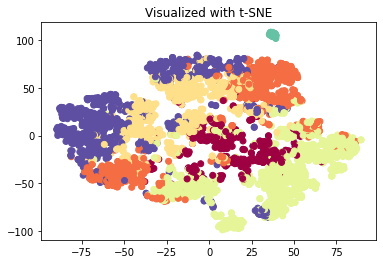

In [30]:
plt.scatter(tsne[:, 0], tsne[:, 1], c=y_pred1, cmap=plt.cm.Spectral)
plt.title('Visualized with t-SNE')
plt.show()